<a href="https://colab.research.google.com/github/malyshevig/bspoc/blob/master/NBC_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

Ваша задача - пошагово выполнить все задания и внести ответы в поля ввода значений на платформе, чтобы получить баллы.

## Задание 1


Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [8]:
# откройте данные: ваш код здесь
import pandas as pd

fp = "https://drive.google.com/uc?id=18fFIiCadWQHk0_wCRWmzGXVXW32CyVFV"
sms_data = pd.read_csv(fp, header=None, sep=",", names=["email", "label"])[1:0]
#sms_data = sms_data.dropna()
sms_data.head()

,email,label


In [6]:
# рассчитайте частоты для классов : ваш код здесь
import matplotlib.pyplot as plt

sms_data = sms_data.dropna()
spam = sms_data['label'].map(lambda x: "spam" if (x == '1') else "ham")

sms_data["spam"] = spam
sms_data=sms_data.drop(columns=['label'])
sms_data_class = sms_data.groupby('spam', dropna = True).count()
sms_data_class.head()



,email
spam,


IndexError: index 0 is out of bounds for axis 0 with size 0

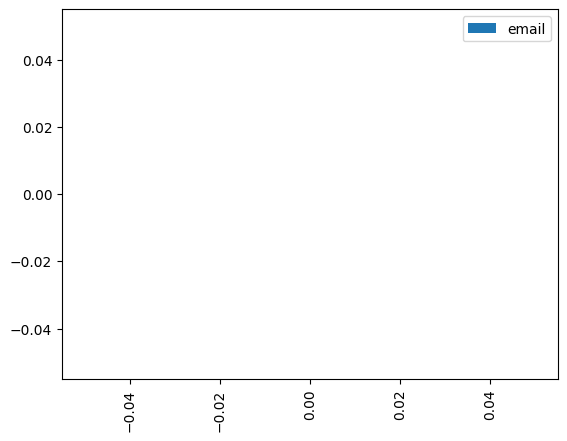

In [7]:
# визуализируйте результат: ваш код здесь

sms_data_class.plot(kind="bar")

## Задание 2

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [289]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [290]:


sms_data_cl = sms_data.copy()

sms_data_cl.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
sms_data_cl.dropna(inplace=True)
sms_data_cl["email"] = sms_data_cl["email"].str.lower()

sms_data_cl.head()

,email,spam


Переводим данные в векторный вид:

In [187]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_data_cl["email"])
y = sms_data_cl["spam"]



Определите, сколько теперь признаков в нашем наборе данных:

In [280]:
#ваш код здесь
print(X.shape)



(2997, 34116)


## Задание 3

Определите целевую переменную и признаки:

In [ ]:
#ваш код здесь

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [291]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной:

In [292]:
#ваш код здесь
P_spam_train = sum([1 for w in y_train if w == "spam"])/y_train.shape[0]
print (P_spam_train)

P_spam_test = sum([1 for w in y_test if w == "spam"])/y_test.shape[0]
print (P_spam_test)


0.16599910992434358
0.16533333333333333


## Задание 4

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [295]:
#ваш код здесь
def train_and_test(alpha=0.01):
     clf = MultinomialNB(alpha=alpha)
     clf.fit(X_train, y_train)
     y_test_pred = clf.predict(X_test)

     accuracy = accuracy_score(y_test, y_test_pred)
     return accuracy, (y_test, y_test_pred)

acc,(y_test, y_test_pred) = train_and_test(0.01)

print(f"Accuracy: {acc} %")


Accuracy: 0.9866666666666667 %


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [284]:
#ваш код здесь
acc,(y_test, y_test_pred) = train_and_test(0.01)


tp = sum([1 for i in range(len) if y_test_pred[i] =='spam' and y_test.iloc[i] == y_test_pred[i] ])
fp = sum([1 for i in range(len) if y_test_pred[i] =='spam' and y_test.iloc[i] != y_test_pred[i] ])
fn = sum([1 for i in range(len) if y_test_pred[i] =='ham' and y_test.iloc[i] != y_test_pred[i] ])
tn = sum([1 for i in range(len) if y_test_pred[i] =='ham' and y_test.iloc[i] == y_test_pred[i] ])
precision = tp / (tp+fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

print (f"tp = {tp}, fp={fp}, tn = {tn}, fn={fn}")
print (f"accuracy= {acc:0.3f} precision = {precision:0.3f}, recall={recall:0.2f} f1-score = {f1_score:0.2f}")

tpr = recall
fpr = fp/(fp+tn)

print (f"tpr = {tpr:0.2f} fpr={fpr:0.2f}")

tp = 114, fp=0, tn = 626, fn=10
accuracy= 98.670 precision = 1.000, recall=0.92 f1-score = 0.96
tpr = 0.92 fpr=0.00


Нарисуйте ROC-кривую:

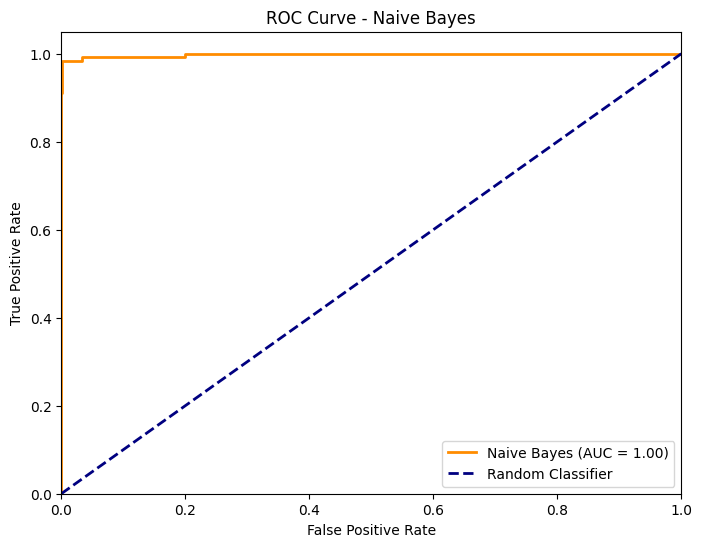

In [279]:
from sklearn.metrics import roc_curve, auc

clf = MultinomialNB(alpha=alpha)
clf.fit(X_train, y_train)
y_test_proba = clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_test_proba,pos_label="spam" )
roc_auc = auc(fpr, tpr)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


## Задание 5

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [270]:
#ваш код здесь
for a in [5, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
    acc,_ = train_and_test(a)
    print (f"a={a} accuracy={acc}")

a=5 accuracy=95.47
a=2 accuracy=98.67
a=1 accuracy=98.93
a=0.5 accuracy=99.33
a=0.1 accuracy=99.33
a=0.05 accuracy=99.33
a=0.01 accuracy=98.67
a=0.005 accuracy=98.67
a=0.001 accuracy=98.53
